In [1]:
N = ord("M") % 3 + 1
print(N)

3


In [2]:
!pip install numpy
!pip install pandas
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Python daily losses: [ 19   0   9  21  27  35  26  24  14  23  18  14  19  17  11  21  32  25
  21  26  15   7  12  35  24  17  17   5  13   9   9   9  29   8  31  17
  27   8  42  20  38   8  21  24  11  26  13  20  17  46  15  19  12   9
  36  15  32  24  23  17  11  19  40  16  18  11  17  17  16  26  19  25
  21   9  19  18  15  15  11  35  18  12  20  18   6  29  26  21  11  32
  13  26   9  20  40  16  18  22  33  12  22  22  33  40  15  17  11  27
  27  22  34  35  35  43  14  30  48  43  42  22  40  32  35  19  14  34
  23  27  33  29  21  39  16  20  14  15  14  12  12   8  23  21  17   8
  18  13  31  20  47  19  12  47  45  24  54  38  73  18  18  29  17  20
  20  27  21   9  24  25  28  19  37  16   9  35  17  24  24  11  17  20
  27  24  27  25  19  51  40  28  21  28  29  30  44  14  16  37  16  15
  37  35  70  36  34  53  16  39  47  39  27  21  14  21  22  20  22  35
   4  13  13  19  16  32  29  25  19  15  16  42  31  59  23  11  10  35
  38  14  36  20  33  15  16  

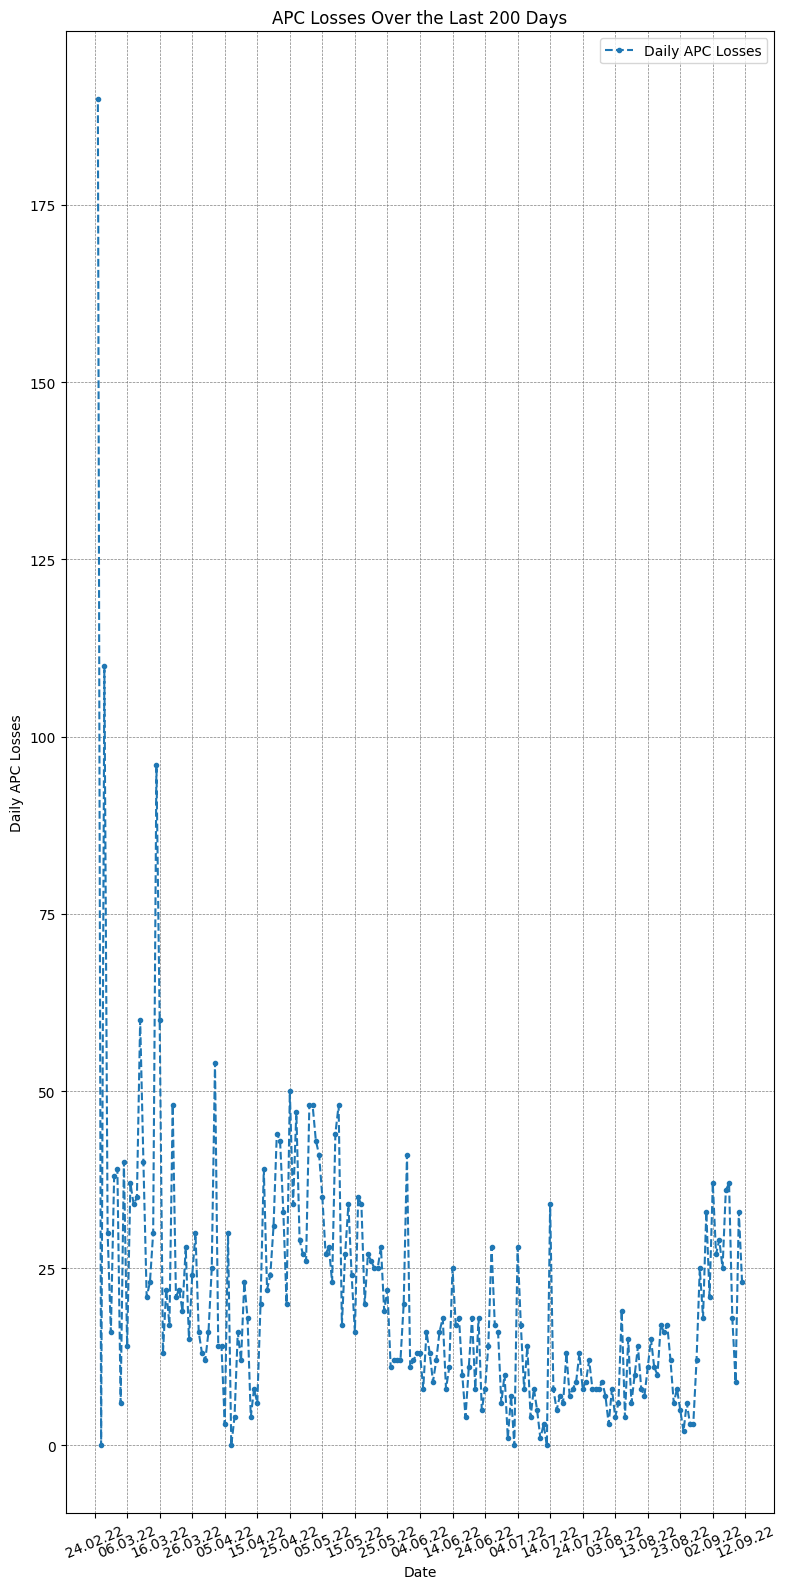

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Task 1: Function to extract a column as a NumPy array
def get_column_as_numpy(file_name, column_name):
    # Read the CSV file
    df = pd.read_csv(file_name)
    # Extract the specified column and return as a NumPy array
    return df[column_name].to_numpy()

# Task 2: Extract the 'APC' column as a NumPy array
file_name = 'russia_losses_equipment.csv'  # Replace with your actual file path
apc_array = get_column_as_numpy(file_name, 'APC')

# Task 3: Find daily losses of APC
# Daily losses = current day APC - previous day APC (i.e., differences between consecutive days)
daily_apc_losses = np.diff(apc_array) * -1
print("APC daily losses:",  daily_apc_losses)

# Task 4: Find the 5 largest daily losses of APC
largest_losses = np.sort(daily_apc_losses)[-5:][::-1]  # Get top 5 and reverse to descending order
print("5 largest day losses:", largest_losses)

# Task 5: APCs destroyed in the summer of 2023 (June 1, 2023 - August 31, 2023)
df = pd.read_csv(file_name)
df['date'] = pd.to_datetime(df['date'])
summer_2023 = df[(df['date'] >= '2023-06-01') & (df['date'] <= '2023-08-31')]
summer_apc_losses = np.diff(summer_2023['APC'].to_numpy()).sum() * -1
print("Summer 2023 losses:", summer_apc_losses);

# Task 6: Average APC losses from day 100 to day 500
days_100_to_500 = df[(df['day'] >= 100) & (df['day'] <= 500)]
average_apc_losses_100_to_500 = np.diff(days_100_to_500['APC'].to_numpy()).mean() * -1
print("Average APC losses from day 100 to day 500", average_apc_losses_100_to_500);

# Task 7: Plot the APC losses for the last 200 days
last_200_days = df.tail(200)
last_200_apc_losses = np.diff(last_200_days['APC'].to_numpy()) * -1

# Create a new index for the x-axis using the dates
x_axis_dates = last_200_days['date'][1:]  # Dates corresponding to daily losses

# Create a new figure with specified size and resolution
plt.figure(figsize=(8, 16), dpi=100)

# Plot the graph with a dashed line
plt.plot(x_axis_dates, last_200_apc_losses, marker='o', markersize=3, linestyle='--', label='Daily APC Losses')

# Set the title and labels
plt.title('APC Losses Over the Last 200 Days')
plt.xlabel('Date')
plt.ylabel('Daily APC Losses')

# Add a legend
plt.legend()

# Add a grid with specified color and line type
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Format the x-axis to display dates in dd.mm.yy format
plt.xticks(rotation=23)

# Set major ticks to show every 10 days
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))

# Save the graph as a PNG file
plt.tight_layout()
plt.savefig('apc_losses_last_200_days.png', format='png')

# Show the plot
plt.show()